In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
import matplotlib.pyplot as plt


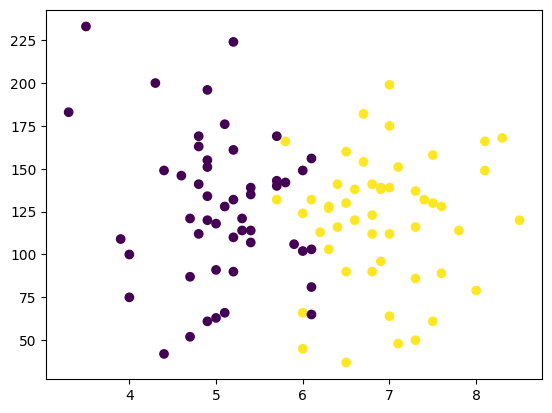

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
12,5.4,139.0
38,6.5,160.0
99,6.2,113.0
77,7.3,50.0
71,6.1,132.0
...,...,...
23,4.7,87.0
64,7.0,64.0
2,5.3,121.0
48,6.6,138.0


In [ ]:
y_train

12    0
38    1
99    1
77    1
71    1
     ..
23    0
64    1
2     0
48    1
21    1
Name: placement, Length: 90, dtype: int64

In [ ]:
X_test

,cgpa,iq
78,6.1,81.0
88,4.4,149.0
61,7.3,137.0
72,7.3,116.0
16,5.2,224.0
5,7.1,48.0
69,8.5,120.0
58,8.0,79.0
98,6.3,103.0
37,8.1,149.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-4.58674649e-01,  3.87609802e-01],
       [ 5.54914419e-01,  9.27066743e-01],
       [ 2.78481037e-01, -2.80289268e-01],
       [ 1.29207010e+00, -1.89866009e+00],
       [ 1.86336576e-01,  2.07790822e-01],
       [-4.58674649e-01, -2.54600842e-01],
       [ 9.41921154e-02, -1.48764528e+00],
       [-2.39370832e+00,  1.51790054e+00],
       [ 9.23492262e-01, -7.16992506e-01],
       [-1.82241267e-01,  2.07790822e-01],
       [-9.19396952e-01, -1.00470287e-01],
       [ 1.56850349e+00,  1.05037119e-01],
       [-1.82241267e-01,  1.15826258e+00],
       [-9.19396952e-01,  6.95870911e-01],
       [ 1.86336576e-01, -1.51333370e+00],
       [-1.74869710e+00, -1.25644945e+00],
       [-2.20941940e+00,  2.80232182e+00],
       [ 2.04765468e-03, -4.60108248e-01],
       [-6.42963570e-01, -8.71123060e-01],
       [-6.42963570e-01, -3.57354545e-01],
       [-1.47226372e+00,  1.95460377e+00],
       [ 4.62769958e-01,  4.38986654e-01],
       [ 1.01563672e+00,  1.92891535e+00],
       [ 8.

In [ ]:
X_test = scaler.transform(X_test)
#Here I am just using scaler.transform not scaler.fit_transform as pattern is already decided in previous state (X_train).

In [ ]:
X_test

array([[-5.26277669, -3.21139822],
       [-6.70617897, -3.16652534],
       [-4.2439045 , -3.17444408],
       [-4.2439045 , -3.18830188],
       [-6.02693084, -3.1170332 ],
       [-4.41371653, -3.23317476],
       [-3.2250323 , -3.1856623 ],
       [-3.64956238, -3.21271801],
       [-5.09296466, -3.19688052],
       [-3.56465637, -3.16652534]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

78    0
88    0
61    1
72    1
16    0
5     1
69    1
58    1
98    1
37    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

#Decision boundary

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

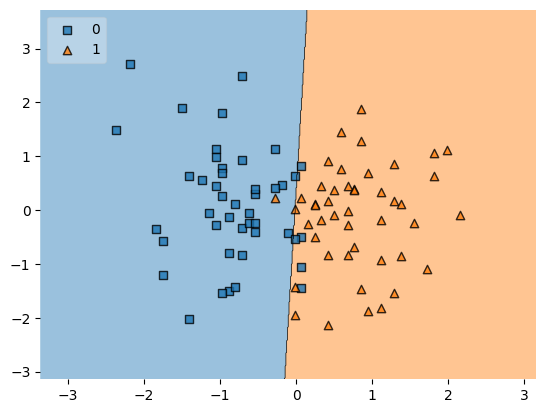

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))